In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
import matplotlib.gridspec as gridspec

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
input_path = '/g/data/e14/erd561/Australia_All/'

In [4]:
temp_z0_1_mod = xr.open_dataset(input_path + 'temp_z0_1_mod.nc').temp_z0_1_mod
temp_z0_1_mod = temp_z0_1_mod.assign_coords(year=temp_z0_1_mod.year-240)
print(temp_z0_1_mod)

temp_z0_025_mod = xr.open_dataset(input_path + 'temp_z0_025_mod.nc').temp_z0_025_mod
temp_z0_025_mod = temp_z0_025_mod.assign_coords(year=temp_z0_025_mod.year-240)
print(temp_z0_025_mod)

temp_z0_01_mod = xr.open_dataset(input_path + 'temp_z0_01_mod.nc').temp_z0_01_mod
print(temp_z0_01_mod)

temp_z0_oisst = xr.open_dataset(input_path + 'temp_z0_oisst.nc').temp_z0_oisst
print(temp_z0_oisst)

<xarray.DataArray 'temp_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 300)>
[4320000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_025_mod' (yt_ocean: 475, xt_ocean: 360, year: 300)>
[51300000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... 19.49 19.72 19.96
  * xt_ocean  (xt_ocean) float64 90.12 90.38 90.62 90.88 ... 179.4 179.6 179.9
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_z0_01_mod' (yt_ocean: 1186, xt_ocean: 900, year: 33)>
[35224200 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 90.05 90.15 90.25 90.35 ... 179.8 17

In [5]:
salt_z0_1_mod = xr.open_dataset(input_path + 'salt_z0_1_mod.nc').salt_z0_1_mod
salt_z0_1_mod = salt_z0_1_mod.assign_coords(year=salt_z0_1_mod.year-240)
print(salt_z0_1_mod)

salt_z0_025_mod = xr.open_dataset(input_path + 'salt_z0_025_mod.nc').salt_z0_025_mod
salt_z0_025_mod = salt_z0_025_mod.assign_coords(year=salt_z0_025_mod.year-240)
print(salt_z0_025_mod)

salt_z0_01_mod = xr.open_dataset(input_path + 'salt_z0_01_mod.nc').salt_z0_01_mod
print(salt_z0_01_mod)

salt_z0_cmems = xr.open_dataset(input_path + 'salt_z0_cmems.nc').salt_z0_cmems
print(salt_z0_cmems)

<xarray.DataArray 'salt_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 300)>
[4320000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'salt_z0_025_mod' (yt_ocean: 475, xt_ocean: 360, year: 300)>
[51300000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... 19.49 19.72 19.96
  * xt_ocean  (xt_ocean) float64 90.12 90.38 90.62 90.88 ... 179.4 179.6 179.9
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'salt_z0_01_mod' (yt_ocean: 1186, xt_ocean: 900, year: 33)>
[35224200 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... 19.75 19.84 19.94
  * xt_ocean  (xt_ocean) float64 90.05 90.15 90.25 90.35 ... 179.8 17

Bbox(x0=0.125, y0=0.5368181818181819, x1=0.9, y1=0.88)
[0.125, 0.5368181818181819, 0.9, 0.88]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Bbox(x0=0.125, y0=0.1250000000000001, x1=0.9, y1=0.46818181818181825)
[0.125, 0.1250000000000001, 0.9, 0.46818181818181825]


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


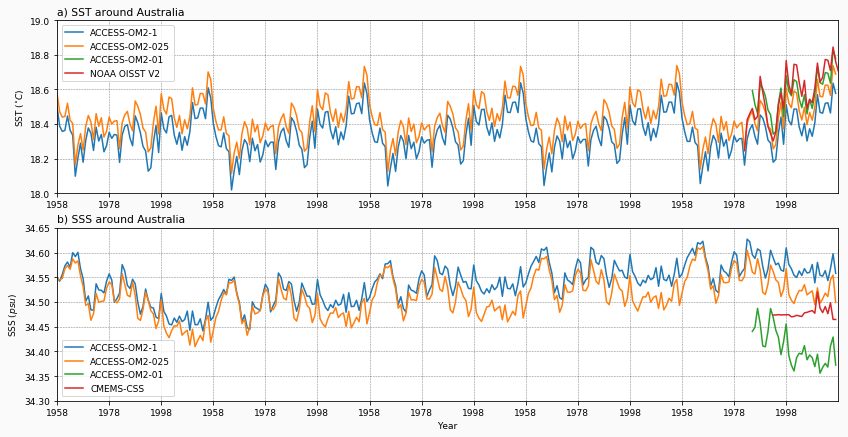

In [10]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(14,7), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=2
col=1

ax = plt.subplot(row, col, 1)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1] 
print(pos_plot)
data = temp_z0_1_mod.interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = temp_z0_025_mod.interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = temp_z0_01_mod.interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = temp_z0_oisst.\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

plt.xlim([1718, 2018])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
plt.xticks(temp_z0_1_mod.year[::20])
plt.gca().set_xticklabels([1958, 1978, 1998]*5)
plt.title('a) SST around Australia', loc='left')
plt.ylabel('SST ($^{\circ}C$)')
plt.xlabel('')
plt.ylim([18, 19])

plt.legend(['ACCESS-OM2-1', 'ACCESS-OM2-025', 'ACCESS-OM2-01', 'NOAA OISST V2'])

ax = plt.subplot(row, col, 2)
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1, pos.y1] 
print(pos_plot)
data = salt_z0_1_mod.interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = salt_z0_025_mod.interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = salt_z0_01_mod.interp(xt_ocean=salt_z0_cmems.lon).interp(yt_ocean=salt_z0_cmems.lat).\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

data = salt_z0_cmems.\
mean('lon').mean('lat')
plot = plt.plot(data.year, data)

plt.xlim([1718, 2018])
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
plt.xticks(temp_z0_1_mod.year[::20])
plt.gca().set_xticklabels([1958, 1978, 1998]*5)
plt.title('b) SSS around Australia', loc='left')
plt.ylabel('SSS ($psu$)')
plt.xlabel('Year')
plt.ylim([34.3, 34.65])

plt.legend(['ACCESS-OM2-1', 'ACCESS-OM2-025', 'ACCESS-OM2-01', 'CMEMS-CSS'], loc='lower left')

savefigure('SST_SSS_timeseries')

In [25]:
salt_z0_1_mod

<xarray.DataArray 'salt_z0_1_mod' (yt_ocean: 160, xt_ocean: 90, year: 300)>
[4320000 values with dtype=float32]
Coordinates:
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... 17.85 18.59 19.36
  * xt_ocean  (xt_ocean) float64 90.5 91.5 92.5 93.5 ... 176.5 177.5 178.5 179.5
  * year      (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017

Bbox(x0=0.125, y0=0.6579411764705883, x1=0.29347826086956524, y1=0.88)
[0.125, 0.6579411764705883, 0.31097826086956526, 0.88]
Bbox(x0=0.3271739130434783, y0=0.6579411764705883, x1=0.4956521739130435, y1=0.88)
[0.3271739130434783, 0.6579411764705883, 0.5131521739130435, 0.88]
Bbox(x0=0.5293478260869566, y0=0.6579411764705883, x1=0.6978260869565218, y1=0.88)
[0.5293478260869566, 0.6579411764705883, 0.7153260869565218, 0.88]
Bbox(x0=0.7315217391304348, y0=0.6579411764705883, x1=0.9000000000000001, y1=0.88)
[0.8215217391304348, 0.6579411764705883, 1.0075, 0.88]
Bbox(x0=0.125, y0=0.3914705882352941, x1=0.29347826086956524, y1=0.6135294117647059)
[0.125, 0.4414705882352941, 0.31097826086956526, 0.6635294117647059]
Bbox(x0=0.3271739130434783, y0=0.3914705882352941, x1=0.4956521739130435, y1=0.6135294117647059)
[0.3271739130434783, 0.4414705882352941, 0.5131521739130435, 0.6635294117647059]
Bbox(x0=0.5293478260869566, y0=0.3914705882352941, x1=0.6978260869565218, y1=0.6135294117647059)
[0.5293

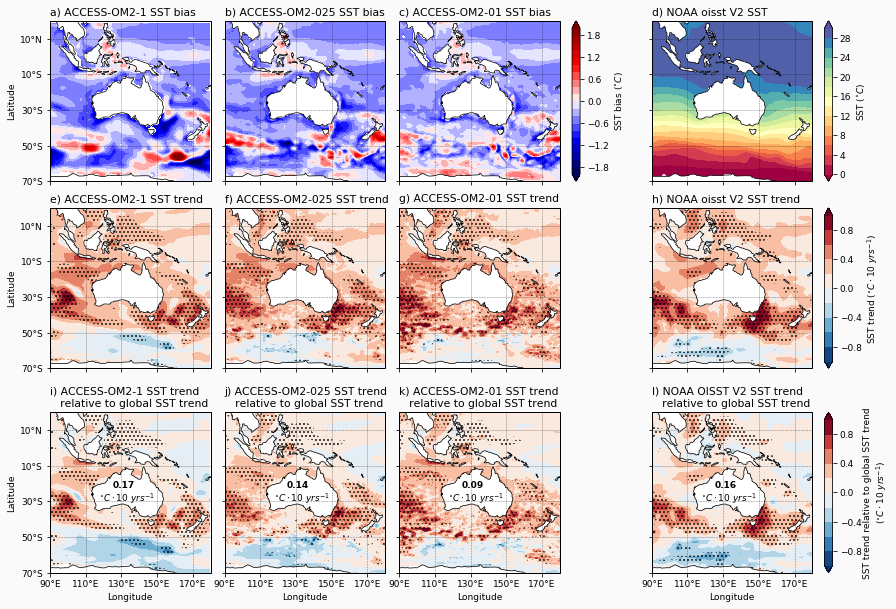

In [24]:
def bbox(pos):
    return matplotlib.transforms.Bbox(np.array([[pos[0],pos[1]],[pos[2],pos[3]]]))
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

# fig = plt.figure(1, figsize=(8,12), facecolor=[0.98,0.98,0.98]) 
fig = plt.figure(1, figsize=(12,12), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 9})    

row=3
col=4

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
levels=arange(-2,2,0.2)
cmap = plt.cm.seismic
data = temp_z0_1_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('a) ACCESS-OM2-1 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = temp_z0_025_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('b) ACCESS-OM2-025 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0, pos.x1+0.0175, pos.y1] 
print(pos_plot)
# levels=arange(0,30,2)
# cmap = plt.cm.Spectral
data = temp_z0_01_mod.mean('year').interp(xt_ocean=temp_z0_oisst.lon+360).interp(yt_ocean=temp_z0_oisst.lat)\
- temp_z0_oisst.mean('year')
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('c) ACCESS-OM2-01 SST bias', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST bias ($^{\circ}C$)', cax=axins)


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0, pos.x1+0.1075, pos.y1] 
print(pos_plot)
levels=arange(0,30,2)
cmap = plt.cm.Spectral
data = temp_z0_oisst.mean('year')
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('d) NOAA oisst V2 SST', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST ($^{\circ}C$)', cax=axins)

ax = plt.subplot(row, col, 5, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_z0_1_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('e) ACCESS-OM2-1 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 6, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_025_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('f) ACCESS-OM2-025 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 7, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.05, pos.x1+0.0175, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_01_slope_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('g) ACCESS-OM2-01 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)

ax = plt.subplot(row, col, 8, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.05, pos.x1+0.1075, pos.y1+0.05] 
print(pos_plot)
# levels=arange(-1,1,0.1)
# cmap = plt.cm.RdBu_r
data = temp_z0_slope_oisst
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_p_value_oisst
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('h) NOAA oisst V2 SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label=r'SST trend ($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)

ax = plt.subplot(row, col, 9, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
levels=arange(-1,1,0.2)
cmap = plt.cm.RdBu_r
data = temp_z0_1_slope_mod - temp_z0_1_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_1_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('i) ACCESS-OM2-1 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_1_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 10, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_025_slope_global_mod*4,temp_z0_025_slope_global_mod*4,temp_z0_025_slope_global_mod)
# cmap = plt.cm.RdBu_r
data = temp_z0_025_slope_mod - temp_z0_025_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_025_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('j) ACCESS-OM2-025 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_025_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 11, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0, pos.y0+0.08, pos.x1+0.0175, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_01_slope_global_mod*4,temp_z0_01_slope_global_mod*4,temp_z0_01_slope_global_mod)
# cmap = plt.cm.RdBu_r
data = temp_z0_01_slope_mod - temp_z0_01_slope_global_mod
plot = plt.contourf(data.xt_ocean, data.yt_ocean, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_01_p_value_mod
plot2 = plt.contourf(data.xt_ocean, data.yt_ocean, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('k) ACCESS-OM2-01 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_01_slope_global_mod,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')

ax = plt.subplot(row, col, 12, projection=ccrs.PlateCarree())
pos = ax.get_position()
print(pos)
pos_plot = [pos.x0+0.09, pos.y0+0.08, pos.x1+0.1075, pos.y1+0.08] 
print(pos_plot)
# levels=arange(-temp_z0_slope_global_oisst*4,temp_z0_slope_global_oisst*4,temp_z0_slope_global_oisst)
print(levels)
cmap = plt.cm.RdBu_r
data = temp_z0_slope_oisst - temp_z0_slope_global_oisst
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())
levels2=[0, 0.05]
# cmap2 = plt.cm.RdBu_r
data2 = temp_z0_p_value_oisst
plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
            colors='none', levels=levels2, transform=ccrs.PlateCarree())
ax.set_position(bbox(pos_plot))
ax.set_title('l) NOAA OISST V2 SST trend \n   relative to global SST trend', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
gtrend = np.round(temp_z0_slope_global_oisst,2)
plt.text(125,-22.5,str(gtrend), fontweight='bold')
plt.text(117.5,-30,'$^{\circ}C \cdot 10\ yrs^{-1}$')
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.075, 0, 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0)
cbar = plt.colorbar(plot, orientation='vertical',
                    label='SST trend relative to global SST trend\n'
                    +r'($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)
# cbar.set_ticks(levels)
# cbar.ax.set_yticklabels([r'$\times$ -4',r'$\times$ -3',r'$\times$ -2',r'$\times$ -1',
#                         r'$\times$ 1',r'$\times$ 2',r'$\times$ 3',r'$\times$ 4',r'$\times$ 5'])

savefigure('SST_bias_trend_0417')